# Iris Flowers Classification ML Project :

## Problem Statement
Create a model that may be used to categorise the various iris flower species.

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

# Author : Rishu Raj Gautam

## Importing Required Libraries

In [24]:
#Data Preprocessing
import pandas as pd 
import numpy as np 
import warnings
warnings.simplefilter("ignore")

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

In [25]:
#Model Training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

## Import Iris Dataset

In [26]:
df=pd.read_csv("iris/iris.data",names=["sepal length","sepal width","petal length","petal width","class"])


In [27]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.shape

(150, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observation** :- The data set contains 150 rows, with 4 features and 1 target variable. These features are having a float data type and they don't have any null values.

In [30]:
#Getting a statiscal overview of the Iris-dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000





Dataset:
Each of the three Iris species—Iris setosa, Iris virginica, and Iris versicolor—has 50 samples in the data set. From each sample, the length and width of the sepals and petals, both in centimetres, were measured. Fisher created a linear discriminant model to separate the species based on the combination of these four features. 

Columns:
1. sepal_length
2. sepal_width
3. petal_length
4. petalwidth
5. species - (Iris Setosa, Iris Versicolour, Iris Virginica)

<AxesSubplot: xlabel='class', ylabel='count'>

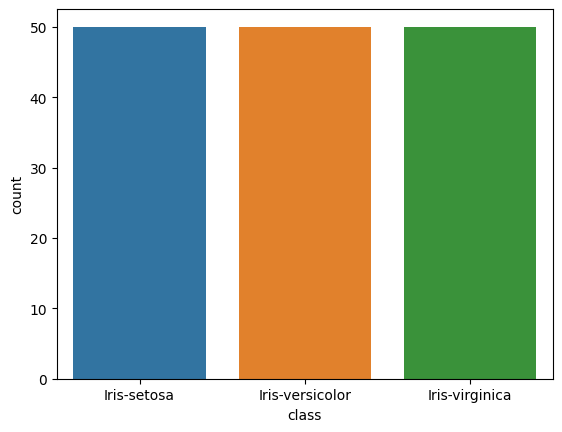

In [31]:
#Countplot to get the number for each class
sns.countplot(x='class', data=df)

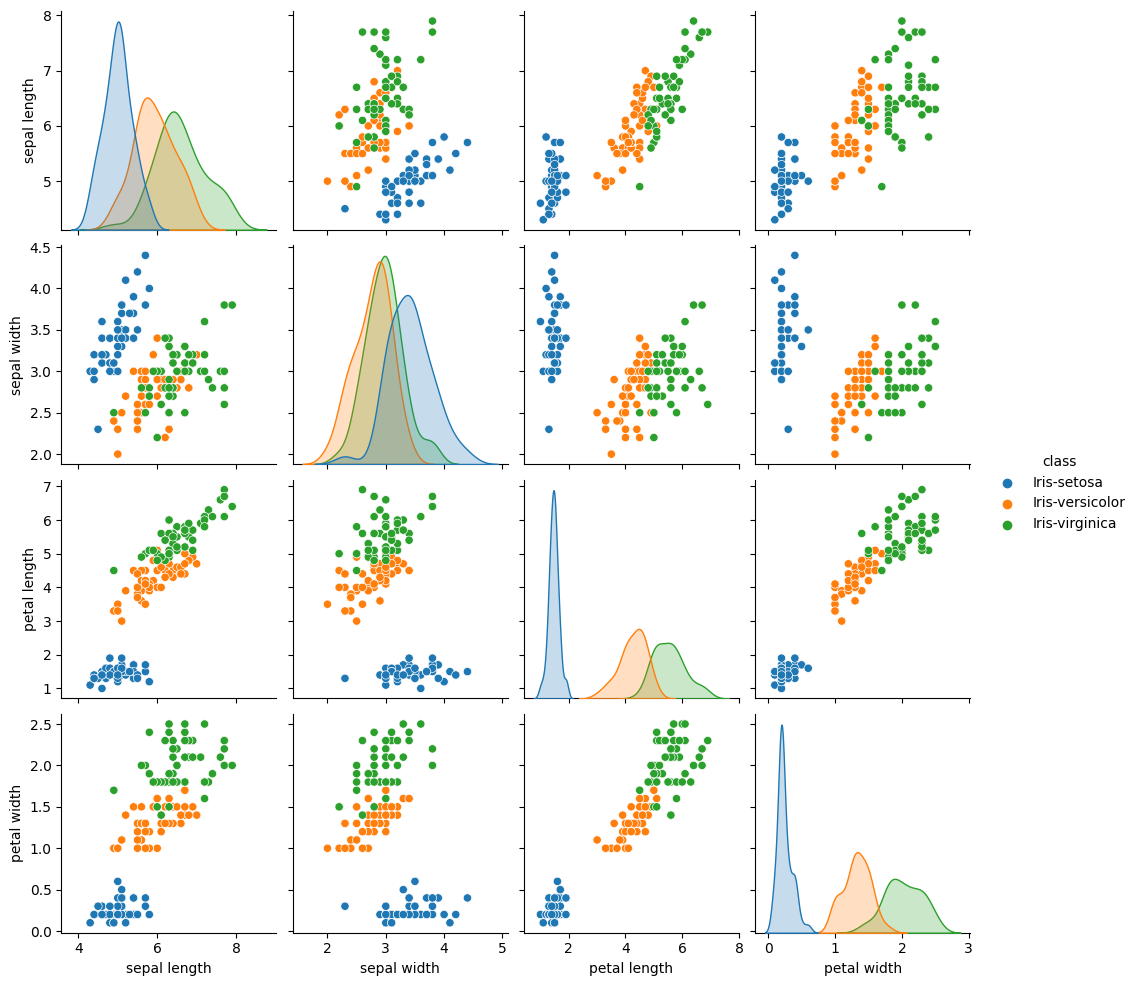

In [32]:
#Pairplot to get the correlation among the 4 features.b
sns.pairplot(df, hue='class')
plt.show()

Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

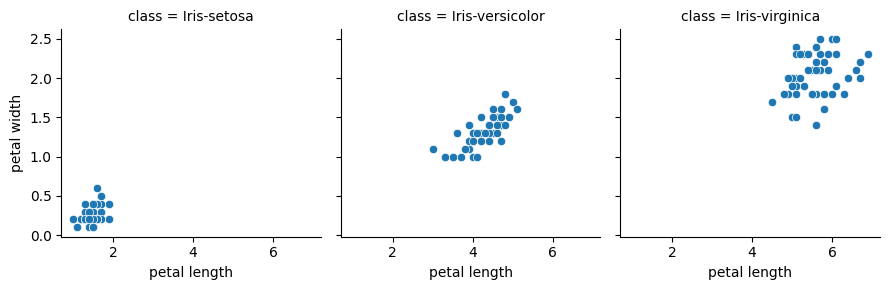

In [33]:
# Using FaceGrid to separate data into multiple graphs.

face_grid = sns.FacetGrid(df, col="class")
face_grid.map(sns.scatterplot, "petal length", "petal width")
plt.show()

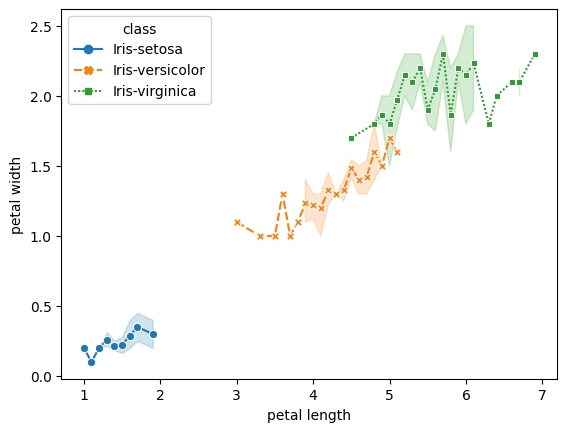

In [34]:
# We can use 'markers' to add symbols (round, square, cross) to each plotted point.

sns.lineplot(data=df, x="petal length", y="petal width", style='class', markers=True, hue="class")
plt.show()

# Machine Learning Part

In [35]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [36]:
x=df[['sepal length', 'sepal width', 'petal length', 'petal width']]
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y=df[["class"]]
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [38]:
#Splitting our dataset into training and testing set, with a test size of 0.2 i.e. it will keep 20% of the instances into testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


# Decision Tree Classifier Model

In [40]:
#Building Decision Tree Classifier Model
modelDecTreeClassifier = DecisionTreeClassifier(criterion = 'entropy')
modelDecTreeClassifier.fit(x_train, y_train)
y_pred = modelDecTreeClassifier.predict(x_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred)))
print('Accuracy Score is : {}' .format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score is : 100.0


In [41]:
df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
print(modelDecTreeClassifier.predict(x.tail()))

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


Observation:- as it gives 100% accuracy so there must be Overfitting of data 

# We will use Random forest Classifier Model

In [46]:
#Building Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
modelRandomForestClassifier = RandomForestClassifier(criterion='gini', max_depth=2)
modelRandomForestClassifier.fit(x_train, y_train)
y_pred = modelRandomForestClassifier.predict(x_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred)))
print('Accuracy Score is : {}' .format(accuracy_score(y_test, y_pred)*100))


ConfusionMatrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy Score is : 96.66666666666667


Observation :- as it gives 96.66 % accuracy so it can be a best model

In [44]:
df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
print(modelRandomForestClassifier.predict(x.tail()))

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


In [48]:
import pickle

In [49]:
pickle.dump(modelDecTreeClassifier,open('modelDecTreeClassifier.pkl','wb'))
pickle.dump(modelRandomForestClassifier,open('modelRandomForestClassifier.pkl','wb'))


# Thank you